# Exploratory Data Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from currency_converter import CurrencyConverter
from currency_converter import RateNotFoundError
from datetime import date

warnings.filterwarnings('ignore')
imdb = pd.read_csv('./IMDB_Movies_2000_2020.csv')


## Dataset Overview

In [3]:
imdb.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language_1,language_2,...,actors_1,actors_f2,description,desc35,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,reviews_from_users
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,01/03/2002,"Comedy, Fantasy, Romance",118,USA,English,French,...,Meg Ryan,"Meg Ryan, Hugh Jackman",An English Duke from 1876 is inadvertedly drag...,An English Duke from 1876 is inadvertedly,6.4,77852,48000000,47121859.0,76019048,341.0
1,tt0118589,Glitter,Glitter,2001,30/11/2001,"Drama, Music, Romance",104,USA,English,NaN,...,Mariah Carey,"Mariah Carey, Max Beesley",A young singer dates a disc jockey who helps h...,A young singer dates a disc jockey,2.2,21298,22000000,4274407.0,5271666,319.0
2,tt0118694,In the Mood for Love,Fa yeung nin wah,2000,27/10/2000,"Drama, Romance",98,"Hong Kong, China",Cantonese,Shanghainese,...,Maggie Cheung,"Maggie Cheung, Tony Chiu-Wai Leung","Two neighbors, a woman and a man, form a stron...","Two neighbors, a woman and a man,",8.1,119171,NaN,2738980.0,12854953,422.0
3,tt0120202,"Hollywood, Vermont",State and Main,2000,31/05/2002,"Comedy, Drama",105,"France, USA",English,Italian,...,Michael Higgins,"Michael Higgins, Michael Bradshaw",A movie crew invades a small town whose reside...,A movie crew invades a small town,6.7,20220,NaN,6944471.0,9206279,175.0
4,tt0120263,Canzoni del secondo piano,Sånger från andra våningen,2000,06/10/2000,"Comedy, Drama",98,"Sweden, Norway, Denmark",Swedish,Russian,...,Lars Nordh,"Lars Nordh, Stefan Larsson",Where are we humans going? A film poem inspire...,Where are we humans going? A film,7.6,17188,NaN,80334.0,80334,110.0


In [4]:
# Column names
imdb.columns

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language_1', 'language_2',
       'language_3', 'director', 'writer', 'actors', 'actors_1', 'actors_f2',
       'description', 'desc35', 'avg_vote', 'votes', 'budget',
       'usa_gross_income', 'worlwide_gross_income', 'reviews_from_users'],
      dtype='object')

In [5]:
# Dataset size
imdb.shape

(5487, 24)

In [6]:
#imdb.avg_vote.isna().sum() 
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5487 entries, 0 to 5486
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_title_id          5487 non-null   object 
 1   title                  5487 non-null   object 
 2   original_title         5487 non-null   object 
 3   year                   5487 non-null   int64  
 4   date_published         5487 non-null   object 
 5   genre                  5487 non-null   object 
 6   duration               5487 non-null   int64  
 7   country                5487 non-null   object 
 8   language_1             5485 non-null   object 
 9   language_2             2170 non-null   object 
 10  language_3             931 non-null    object 
 11  director               5487 non-null   object 
 12  writer                 5483 non-null   object 
 13  actors                 5486 non-null   object 
 14  actors_1               5487 non-null   object 
 15  acto

## Number of Films for Each Country

In [7]:
array_country = []
for str in imdb.country:
    countrys = str.split(',')
    for country in countrys:
        array_country.append(country.strip())
        
country, frequency = np.unique(array_country, return_counts=True)

country = np.reshape(country, (country.shape[0],1))
frequency = np.reshape(frequency, (frequency.shape[0],1))
country = np.concatenate((country, frequency),axis=1)

bond = 30

data=pd.DataFrame({"num_of_movies": country[:,1].astype(np.int)},index= country[:,0])
minority = data[data.num_of_movies<bond]
sum1 = minority.sum()
data_new  = data[data.num_of_movies>=bond]
data_new = pd.concat([data_new, pd.DataFrame({"num_of_movies": sum1.num_of_movies}, index = ['Others'])])
# -------After sorting-----------
data = data.sort_values(by = ['num_of_movies'],ascending = False)
data[:10]

,num_of_movies
USA,4024
UK,1064
France,648
Germany,564
Canada,554
India,362
Japan,217
Spain,178
Australia,171
China,170


In [8]:
def split_names(col):
    array = []
    imdb_sub = imdb.dropna(subset = [col])
    for ind in imdb_sub.index:
        names = imdb_sub.at[ind, col].split(',')
        for name in names:
            array.append(name.strip())
            
    return np.unique(array, return_counts=True)

In [9]:
def combine_name_freq(names, freq, bond = 30):
    # print("--------in function----------")
    names = np.reshape(names, (names.shape[0],1))
    freq = np.reshape(freq, (freq.shape[0],1))
    names = np.concatenate((names, freq),axis=1)

    data= pd.DataFrame({"names": names[:,0], "num": names[:,1].astype(np.int)})
    data = data.sort_values(by = ['num'], ascending = False)
    
    if(bond>0):
        # print(data)
        minority = data[data.num<bond]
        # print("minority")
        # print(minority)
        sum1 = minority.sum()
        data_new  = data[data.num>=bond]
        data_new = pd.concat([data_new, pd.DataFrame({"num": sum1.num}, index = ['Others'])])
        # -------After sorting-----------
        data = data_new.sort_values(by = ['num'],ascending = False)
    return data

In [10]:
def relation_plot(df, cmap = 'RdPu', xlog = False, ylog = False,figsize = (20, 10)):
    
    columns = df.columns
    df = df.astype(int)
    colors = np.random.rand(len(df))
    # print(df)
    fig = plt.figure(figsize=figsize, dpi=80)
    ax = plt.gca()
    if(xlog): ax.set_xscale('log')
    if(ylog): ax.set_yscale('log')
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.scatter(df[columns[0]], df[columns[1]], c=colors, alpha = 0.2, cmap = cmap)
    plt.show()

                            names  num
34116           Samuel L. Jackson   57
27843              Morgan Freeman   45
5555                 Bruce Willis   42
34561          Scarlett Johansson   41
40093                Willem Dafoe   40
...                           ...  ...
15644          Imogene Wolodarsky    1
15643           Imogen Waterhouse    1
15641              Imogen Mcaulay    1
15637            Imelda Colindres    1
41118  Þorsteinn Gunnar Bjarnason    1

[41119 rows x 2 columns]


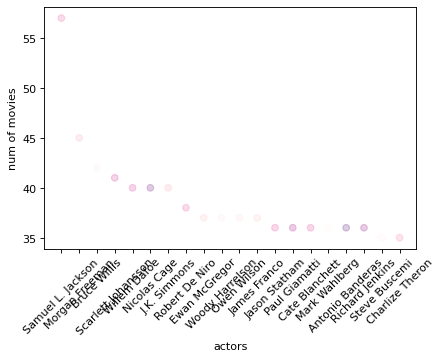

In [17]:
actors, actor_freq = split_names('actors')
actors = combine_name_freq(actors, actor_freq, bond = 0)
print(actors)
#colors = np.random.rand(len(actors))
colors = np.random.rand(20)
fig = plt.figure(dpi=80)
ax = plt.gca()
ax.set_xlabel('actors')
ax.set_ylabel("num of movies")
ax.scatter(actors.names[:20], actors.num[:20], c=colors, alpha = 0.2, cmap = 'RdPu')
plt.xticks(rotation = 45)
plt.show()

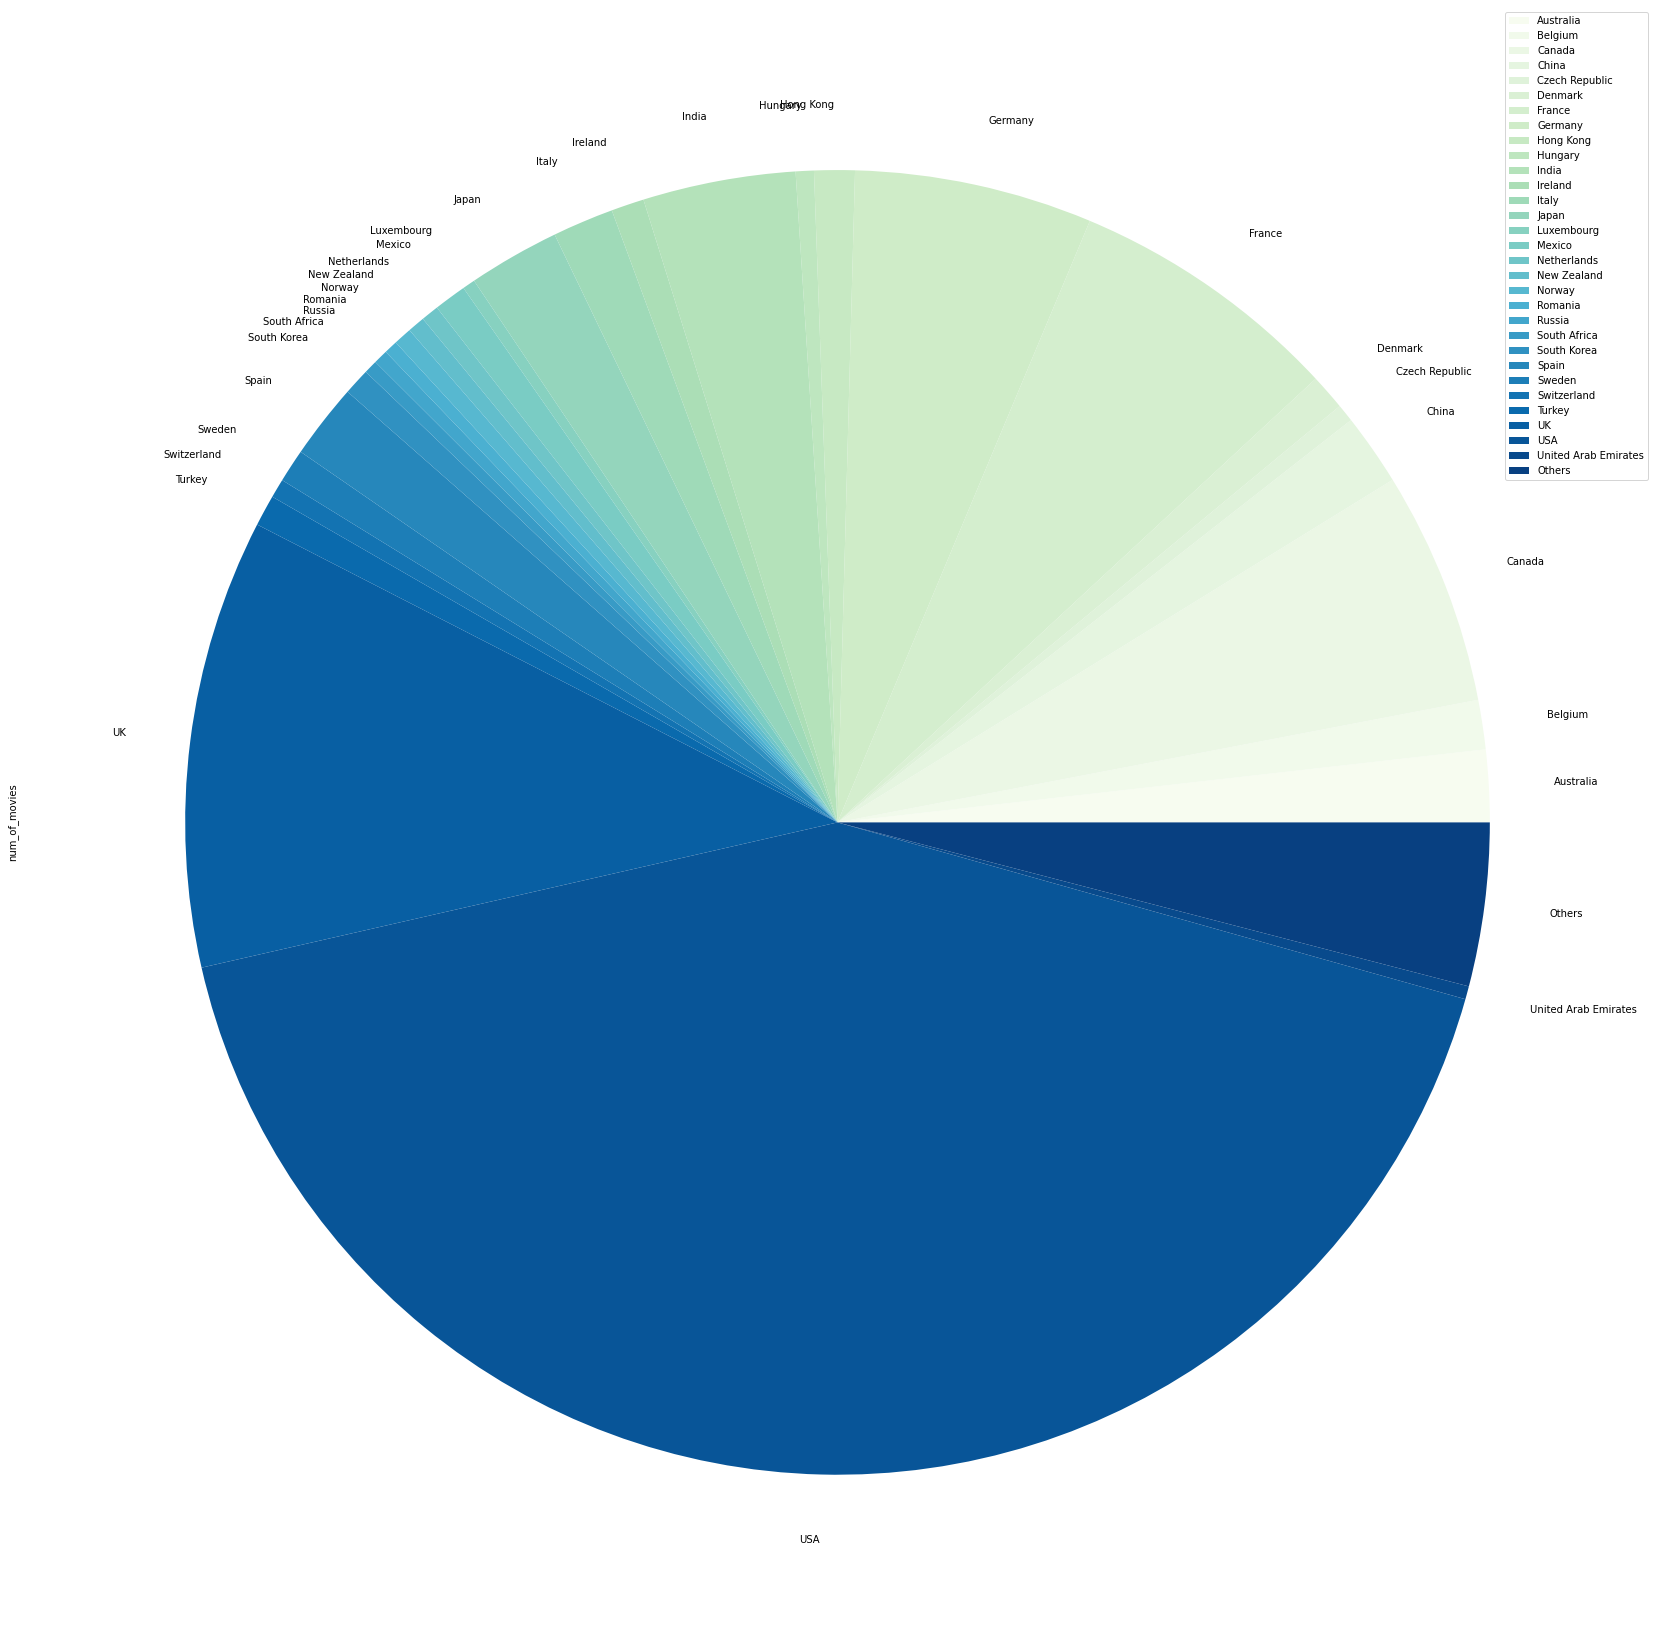

In [12]:
ax1 = data_new.plot.pie(y = 'num_of_movies', figsize = (30,30), cmap='GnBu')

## Number of Films for Each Genre

In [11]:
array_genre = []
for str in imdb.genre:
    genres = str.split(',')
    for genre in genres:
        array_genre.append(genre.strip())
        
genre, frequency = np.unique(array_genre, return_counts=True)

genre = np.reshape(genre, (genre.shape[0],1))
frequency = np.reshape(frequency, (frequency.shape[0],1))
genre = np.concatenate((genre, frequency),axis=1)

bond = 30

data_genre=pd.DataFrame({"num_of_movies": genre[:,1].astype(np.int)},index= genre[:,0])
minority = data_genre[data_genre.num_of_movies<bond]
sum1 = minority.sum()
data_genre_new  = data_genre[data_genre.num_of_movies>=bond]
data_genre_new = pd.concat([data_genre_new, pd.DataFrame({"num_of_movies": sum1.num_of_movies}, index = ['Others'])])
# -------After sorting-----------
data_genre = data_genre.sort_values(by = ['num_of_movies'],ascending = False)
data_genre[:10]

,num_of_movies
Drama,3142
Comedy,2011
Action,1480
Crime,1066
Thriller,964
Romance,961
Adventure,942
Horror,673
Mystery,592
Fantasy,435


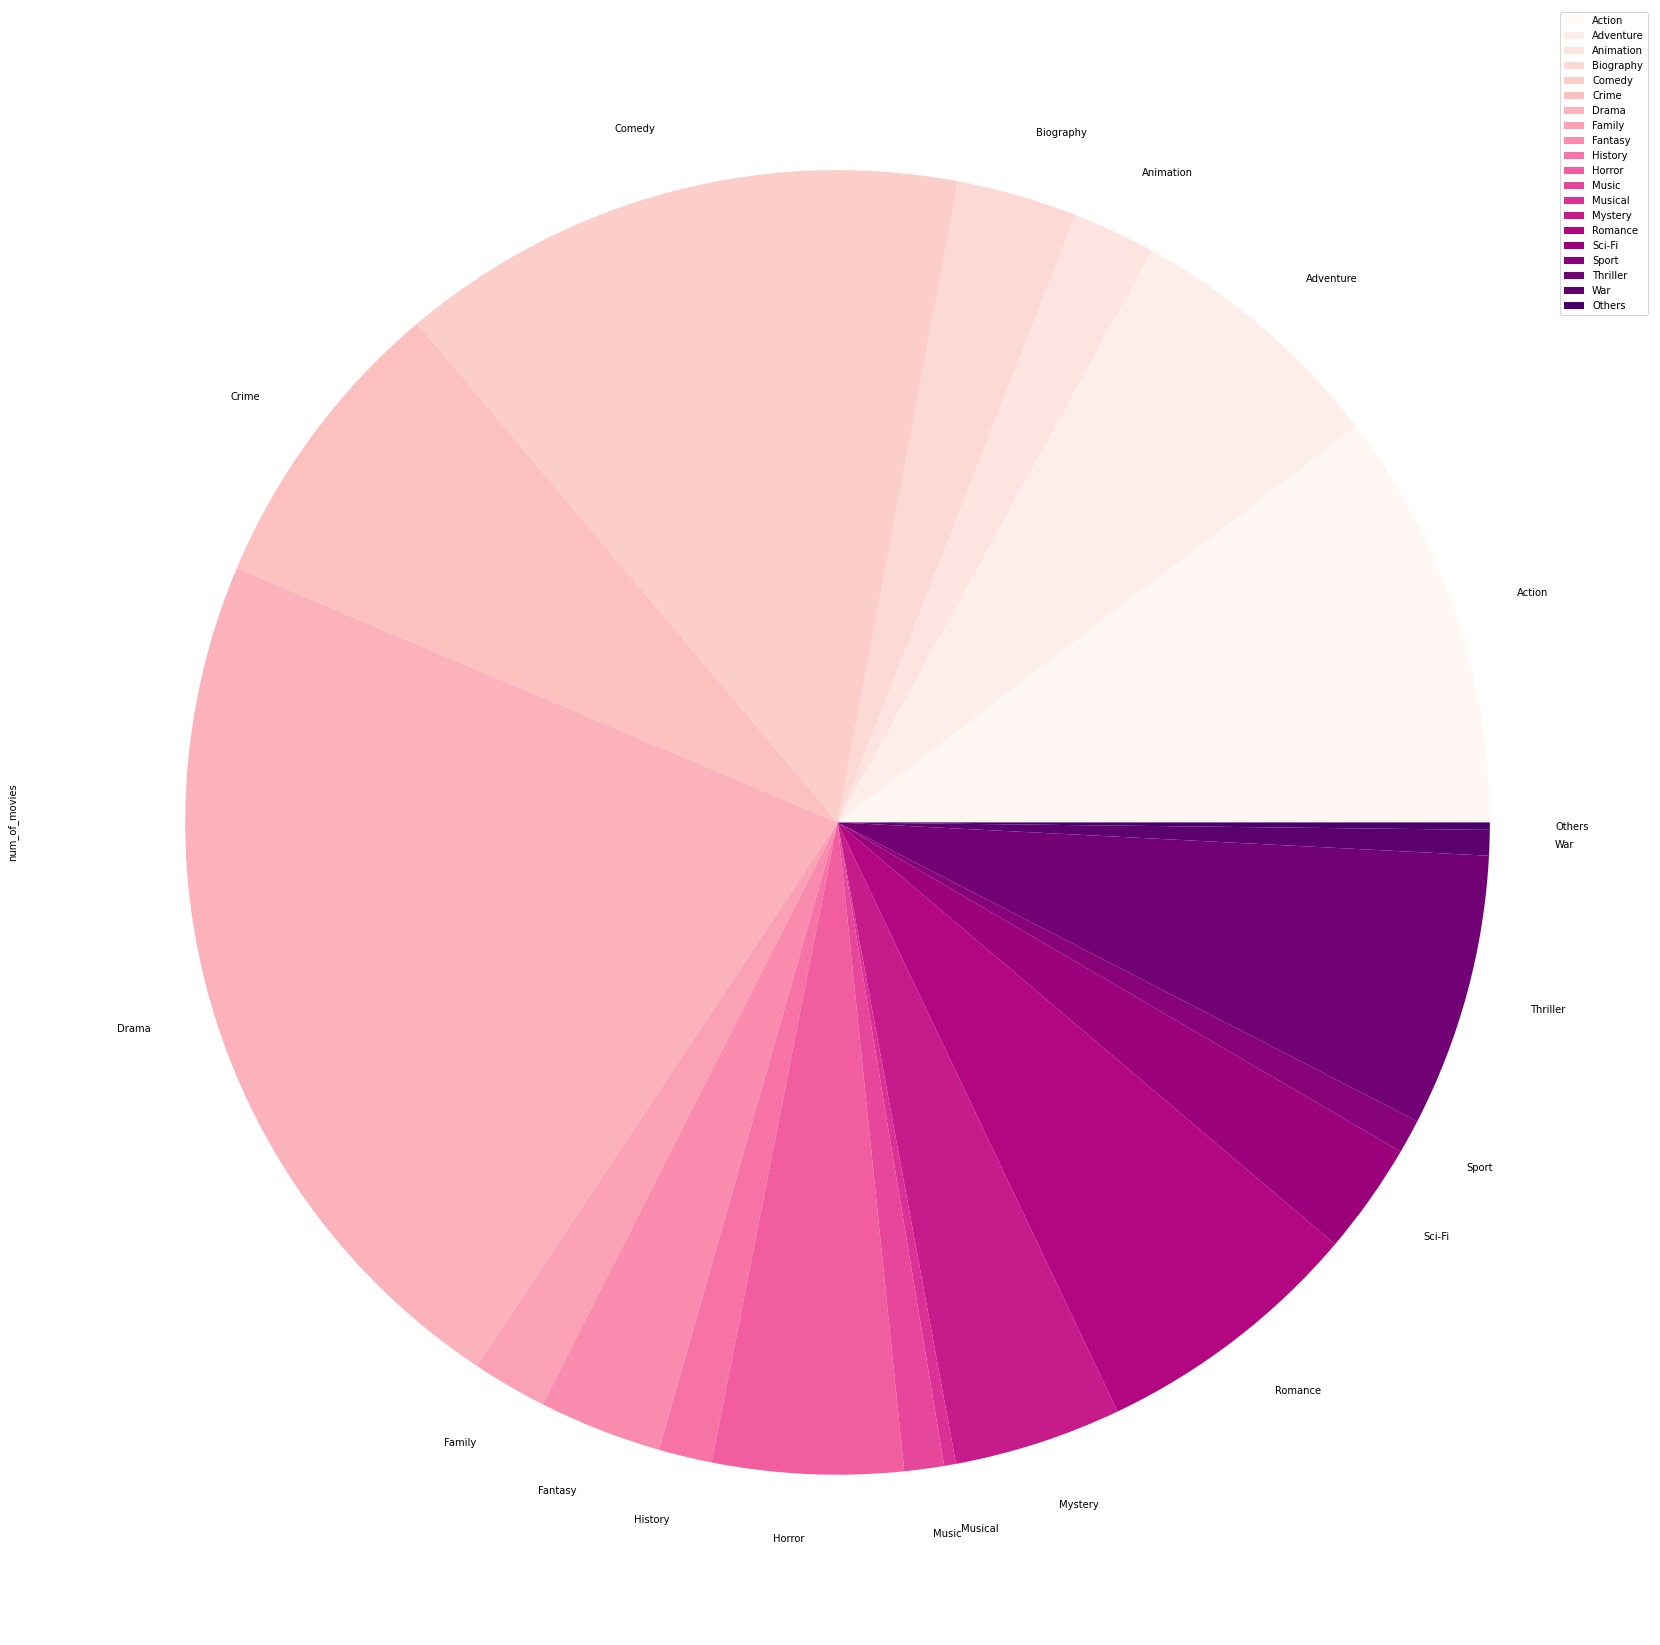

In [12]:
ax2 = data_genre_new.plot.pie(y = 'num_of_movies', figsize = (30,30), cmap='RdPu')

## Relation between Film Budgets and Average Votes

In [13]:
def currency_conv(col, df):
    df_sub = []
    for ind in df.index:
        if(df.at[ind, col].isnumeric() == False):
            df_sub.append(df.loc[ind])
            df = df.drop(index=ind)
    df_sub = pd.DataFrame(df_sub, columns = df.columns)
    c = CurrencyConverter(decimal=True)
    for ind in df_sub.index:
        temp_str = df_sub.at[ind, col]
        currency = temp_str[0:3]
        amount = int(temp_str[3:].strip())
        try:
            converted = c.convert(amount, currency.strip(), 'USD', date=date(2022, 3, 31))
        except ValueError:
            df_sub = df_sub.drop(index=ind)
        except RateNotFoundError:
            df_sub = df_sub.drop(index=ind)
        else:
            df_sub.at[ind, col] = float(converted)

    #print(non_dollars.to_string())
    df = pd.concat([df, df_sub])
    df.sort_index()
    return df
    

In [14]:
def split_cols(col1, col2):
    imdb_sub = imdb.dropna(subset = [col1, col2])
    imdb_sub = imdb_sub[[col1, col2]]
    return imdb_sub

In [16]:
print(imdb.columns)

Index(['imdb_title_id', 'title', 'original_title', 'year', 'date_published',
       'genre', 'duration', 'country', 'language_1', 'language_2',
       'language_3', 'director', 'writer', 'actors', 'actors_1', 'actors_f2',
       'description', 'desc35', 'avg_vote', 'votes', 'budget',
       'usa_gross_income', 'worlwide_gross_income', 'reviews_from_users'],
      dtype='object')


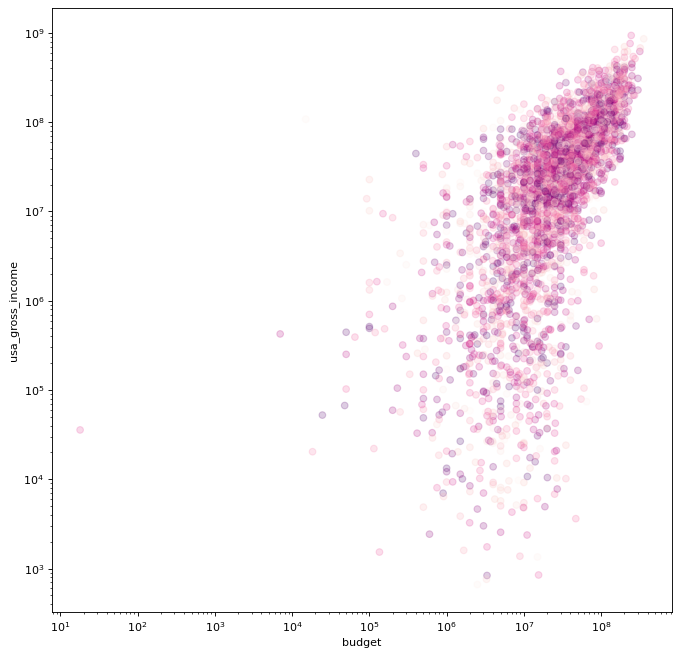

In [17]:
budget_usa_income = split_cols('budget','usa_gross_income')
budget_usa_income = currency_conv('budget', budget_usa_income)
# print(budget_usa_income)
relation_plot(budget_usa_income, xlog = True, ylog = True,figsize=(10,10))

           budget worlwide_gross_income
0        48000000              76019048
1        22000000               5271666
5        45000000             224834564
6       100000000             333535934
7        12000000              56298474
...           ...                   ...
5373       923610                  3417
5383      24637.9              27590180
5384  2.63889e+06                536525
5422  5.93749e+06              39346577
5426  2.88626e+06               2027391

[4032 rows x 2 columns]


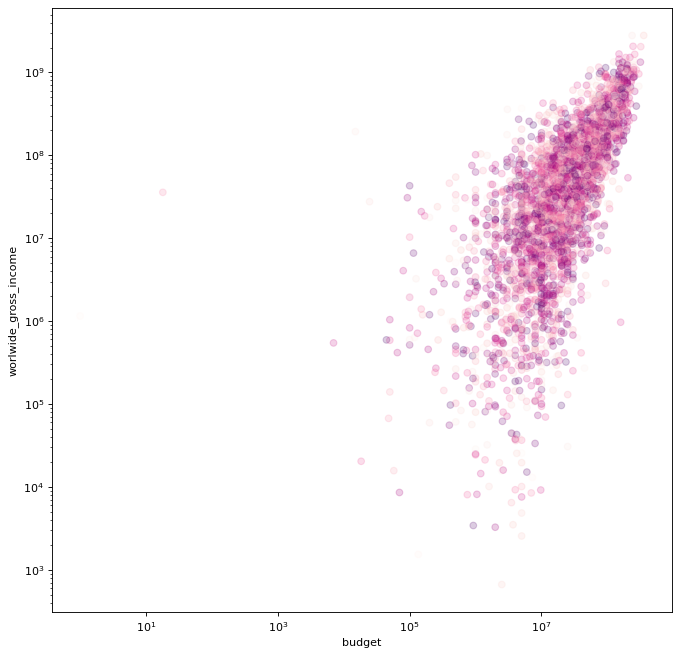

In [18]:
budget_income = split_cols('budget','worlwide_gross_income')
budget_income = currency_conv('budget', budget_income)
budget_income = currency_conv('worlwide_gross_income', budget_income)
print(budget_income)
relation_plot(budget_income, xlog=True, ylog = True,figsize=(10,10))

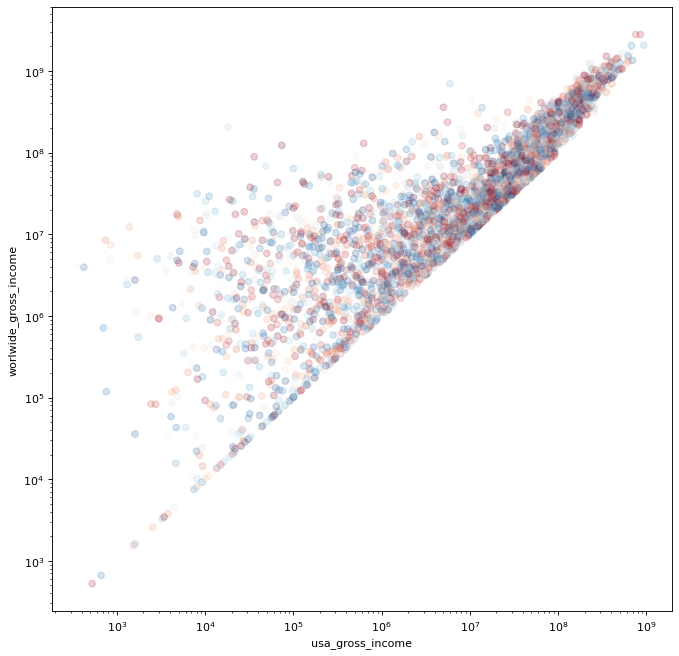

In [19]:
usa_world_income = split_cols('usa_gross_income', 'worlwide_gross_income')
usa_world_income = currency_conv('worlwide_gross_income', usa_world_income)
relation_plot(usa_world_income, cmap='RdBu', xlog=True, ylog=True, figsize=(10,10))

In [20]:
budget_avg_votes = imdb.dropna(subset = ['budget', 'avg_vote'])

budget_avg_votes = budget_avg_votes[['budget', 'avg_vote']]
budget_avg_votes = budget_avg_votes.astype({'avg_vote': float})
non_dollars = []

for ind in budget_avg_votes.index:
    if(budget_avg_votes.loc[ind].budget.isnumeric() == False):
        non_dollars.append([budget_avg_votes.loc[ind].budget.strip(),budget_avg_votes.loc[ind].avg_vote])
        budget_avg_votes = budget_avg_votes.drop(index=ind)

non_dollars = pd.DataFrame(non_dollars, columns = ['budget', 'avg_vote'])

c = CurrencyConverter(decimal=True)
from currency_converter import RateNotFoundError
from datetime import date
for ind in non_dollars.index:
    if(ind == 460):
        print("460: ", non_dollars.loc[ind])
    temp_str = non_dollars.loc[ind].budget
    currency = temp_str[0:3]
    amount = int(temp_str[3:].strip())
    # print("currency: ", currency, " amount: ", amount)
    try:
        converted = c.convert(amount, currency.strip(), 'USD', date=date(2022, 3, 31))
        # print("converted: ", converted)
        # print("After conversion: ",non_dollars.loc[ind].budget)
    except ValueError:
        non_dollars = non_dollars.drop(index=ind)
        # print("Row Dropped")
    except RateNotFoundError:
        non_dollars = non_dollars.drop(index=ind)
    else:
        non_dollars.at[ind, 'budget'] = float(converted)

#print(non_dollars.to_string())
budget_avg_votes = pd.concat([budget_avg_votes, non_dollars])
budget_avg_votes.sort_index()
#print("-----FINALLY-------")
print(budget_avg_votes.to_string())

460:  budget      JPY 3000000
avg_vote            7.7
Name: 460, dtype: object
           budget  avg_vote
0        48000000       6.4
1        22000000       2.2
5        45000000       7.0
6       100000000       5.7
7        12000000       7.4
8        35000000       6.8
9        93000000       8.8
10        8000000       5.9
11      125000000       6.1
12       33000000       6.7
13       38000000       6.7
14       75000000       7.4
15      140000000       6.2
16       75000000       6.6
17      100000000       7.3
18       40000000       7.3
19      115000000       6.5
20      113000000       7.5
21       24000000       6.9
22       35000000       6.2
23       60000000       7.8
24      127500000       6.5
25       76000000       4.2
26       94000000       4.6
27       10000000       4.9
28      100000000       5.7
29      140000000       7.2
30       40000000       5.6
31       23000000       7.1
32       90000000       4.9
33       60000000       6.2
34       95000000       6

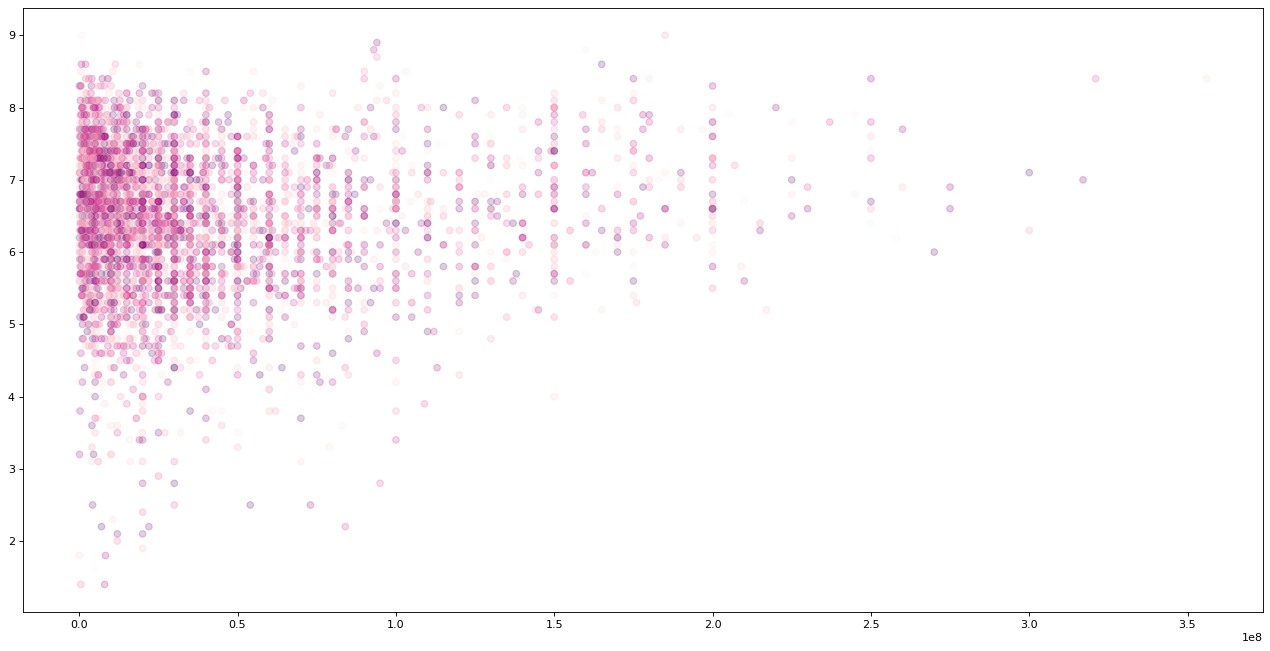

In [21]:
colors = np.random.rand(len(budget_avg_votes))

fig = plt.figure(figsize=(20, 10), dpi=80)
ax = plt.gca()
ax.scatter(budget_avg_votes.budget.astype(int), budget_avg_votes.avg_vote,c=colors, alpha = 0.2, cmap = 'RdPu')
plt.show()

## Number of Films for Each Language

In [22]:
films_per_language1 = imdb[["imdb_title_id", "language_1"]].groupby("language_1").count()
films_per_language1 = pd.DataFrame(films_per_language1).reset_index()
films_per_language1.columns = ['language', 'num_of_films']
films_per_language1

films_per_language2 = imdb[["imdb_title_id", "language_2"]].groupby("language_2").count()
films_per_language2 = pd.DataFrame(films_per_language2).reset_index()
films_per_language2.columns = ['language', 'num_of_films']
films_per_language2

films_per_language3 = imdb[["imdb_title_id", "language_3"]].groupby("language_3").count()
films_per_language3 = pd.DataFrame(films_per_language3).reset_index()
films_per_language3.columns = ['language', 'num_of_films']
films_per_language3

films_per_language = pd.concat([films_per_language1, films_per_language2, films_per_language3], axis=0)

films_per_language = films_per_language.groupby(['language'], as_index=False)['num_of_films'].sum()

films_per_language_sorted = films_per_language.sort_values(by=['num_of_films'], ascending=False)
films_per_language_sorted[:10]

,language,num_of_films
40,English,4730
137,Spanish,578
46,French,556
49,German,297
56,Hindi,297
67,Japanese,221
122,Russian,207
66,Italian,176
88,Mandarin,131
10,Arabic,104


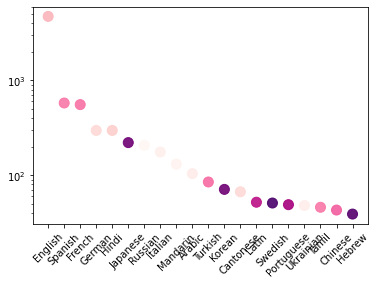

In [23]:
fig = plt.figure()
ax = plt.gca()
colors = np.random.rand(20)
# sizes = films_per_language_sorted.num_of_films[:20]/np.linalg.norm(films_per_language_sorted.num_of_films[:20])*10000
ax.scatter(films_per_language_sorted.language[:20], films_per_language_sorted.num_of_films[:20], c=colors, s = 100, alpha=0.9, cmap='RdPu')
plt.xticks(rotation=45)
ax.set_yscale('log')
plt.show()

## Other Numerical Variables Distribution

### Published Year

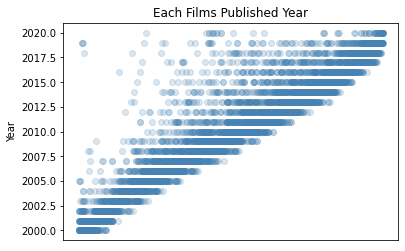

In [24]:
plt.scatter(imdb.title, imdb.year, c='steelblue', alpha=0.2)
#plt.xticks(imdb.title[::100],  rotation='vertical')
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)

plt.title('Each Films Published Year')
plt.xlabel('Films')
plt.ylabel('Year')
plt.show()

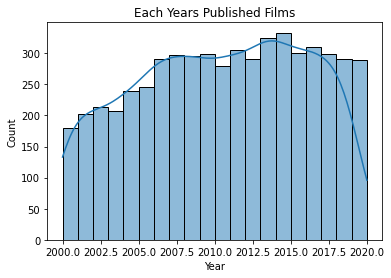

In [25]:
sns.histplot(data=imdb, x='year', kde=True) 
_=plt.title('Each Years Published Films')
_=plt.xlabel('Year')
_=plt.ylabel('Count')
plt.show()

### Films Average Rate

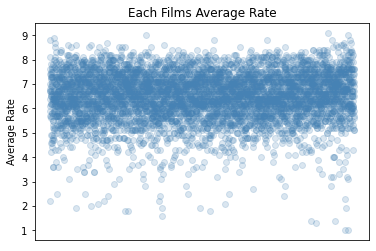

In [26]:
plt.scatter(imdb.title, imdb.avg_vote, c='steelblue', alpha=0.2)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)

_=plt.title('Each Films Average Rate')
_=plt.xlabel('Films')
_=plt.ylabel('Average Rate')

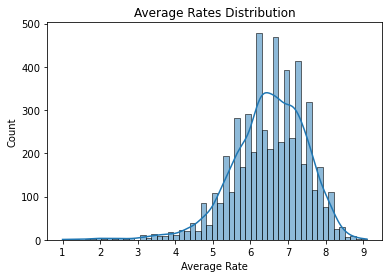

In [27]:
sns.histplot(data=imdb, x='avg_vote', kde=True) 
_=plt.title('Average Rates Distribution')
_=plt.xlabel('Average Rate')
_=plt.ylabel('Count')
plt.show()

### Films Duration

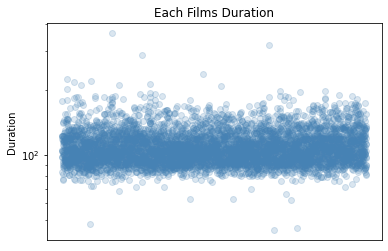

In [28]:
plt.scatter(imdb.title, imdb.duration, c='steelblue', alpha=0.2)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.set_yscale('log')
plt.title('Each Films Duration')
plt.xlabel('Films')
plt.ylabel('Duration')
plt.show()

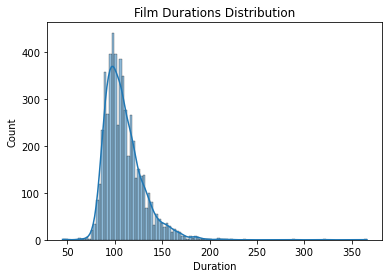

In [29]:
sns.histplot(data=imdb, x='duration', kde=True) 
plt.title('Film Durations Distribution')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.show()

### Number of people vote

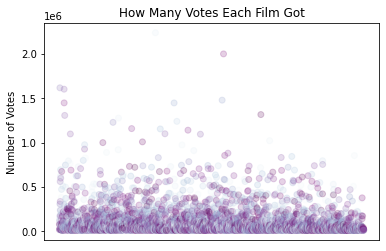

In [30]:
colors = np.random.rand(len(imdb))
plt.scatter(imdb.title, imdb.votes, c=colors, cmap='BuPu', alpha=0.2)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
# frame.set_yscale('log')
plt.title('How Many Votes Each Film Got')
plt.xlabel('Films')
plt.ylabel('Number of Votes')
plt.show()

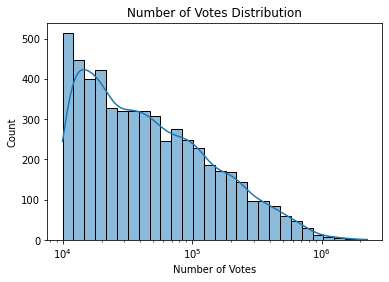

In [31]:
sns.histplot(data=imdb, x='votes', log_scale = True, kde=True)
plt.title('Number of Votes Distribution')
plt.xlabel('Number of Votes')
plt.ylabel('Count')
plt.show()

### Number of Reviews from Users

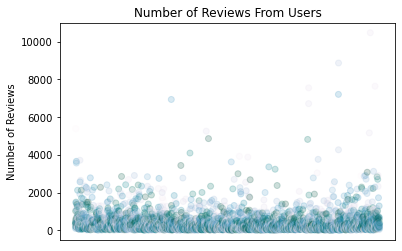

In [32]:
colors = np.random.rand(len(imdb))
plt.scatter(imdb.title, imdb.reviews_from_users, c=colors, cmap='PuBuGn', alpha=0.2)
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)

plt.title('Number of Reviews From Users')
plt.xlabel('Films')
plt.ylabel('Number of Reviews')
plt.show()

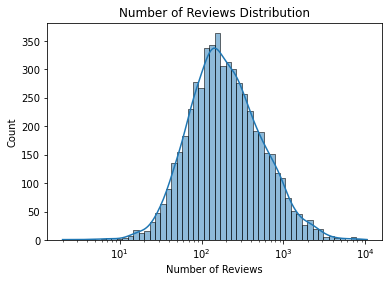

In [33]:
sns.histplot(data=imdb, x='reviews_from_users', log_scale = True, kde=True) 
plt.title('Number of Reviews Distribution')
plt.xlabel('Number of Reviews')
plt.ylabel('Count')
plt.show()

### USA Gross Income

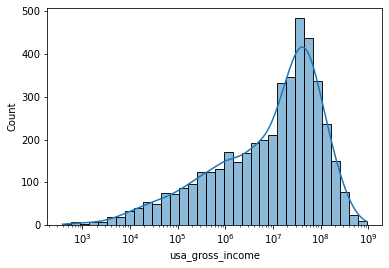

In [34]:
sns.histplot(data=imdb, x='usa_gross_income', log_scale = True, kde=True) 
plt.show()

## Rank Films by Average Rates

### 10 Best Films

In [35]:
# 10 best films
imdb_rated = imdb.sort_values(by=['avg_vote'], ascending=False)
imdb_rated.head(10)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language_1,language_2,...,actors_1,actors_f2,description,desc35,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,reviews_from_users
5007,tt5354160,Aynabaji,Aynabaji,2016,30/09/2016,"Crime, Mystery, Thriller",147,Bangladesh,Bengali,NaN,...,Chanchal Chowdhury,"Chanchal Chowdhury, Masuma Rahman Nabila",Ayna is an actor and the prison is his stage. ...,Ayna is an actor and the prison,9.1,19876,BDT 35000000,NaN,NaN,114.0
5373,tt7738784,Peranbu,Peranbu,2018,01/02/2019,Drama,147,India,Tamil,NaN,...,Mammootty,"Mammootty, Sadhana, Anjali","A single father tries to raise his daughter, w...",A single father tries to raise,9.0,11752,INR 70000000,NaN,3417,369.0
1725,tt0468569,Il cavaliere oscuro,The Dark Knight,2008,23/07/2008,"Action, Crime, Drama",152,"USA, UK",English,Mandarin,...,Christian Bale,"Christian Bale, Heath Ledger",When the menace known as the Joker wreaks havo...,When the menace known as the Joker,9.0,2241615,185000000,535234033.0,1005455211,6938.0
84,tt0167260,Il Signore degli Anelli - Il ritorno del re,The Lord of the Rings: The Return of the King,2003,22/01/2004,"Action, Adventure, Drama",201,"New Zealand, USA",English,Quenya,...,Noel Appleby,"Noel Appleby, Ali Astin",Gandalf and Aragorn lead the World of Men agai...,Gandalf and Aragorn lead the World,8.9,1604280,94000000,377845905.0,1142271098,3718.0
3907,tt2170667,Wheels,Wheels,2014,01/02/2017,Drama,115,USA,English,NaN,...,Donavon Warren,"Donavon Warren, Patrick Hume",Two suicidal paraplegic junkies hustle their w...,Two suicidal paraplegic junkies,8.8,17814,NaN,NaN,NaN,41.0
2952,tt1375666,Inception,Inception,2010,24/09/2010,"Action, Adventure, Sci-Fi",148,"USA, UK",English,Japanese,...,Leonardo DiCaprio,"Leonardo DiCaprio, Joseph Gordon-Levitt",A thief who steals corporate secrets through t...,A thief who steals corporate secrets,8.8,2002816,160000000,292576195.0,869784991,3927.0
5403,tt8110330,Dil Bechara,Dil Bechara,2020,24/07/2020,"Comedy, Drama, Romance",101,India,Hindi,NaN,...,Sushant Singh Rajput,Sushant Singh Rajput,The emotional journey of two hopelessly in lov...,The emotional journey of two hopelessly,8.8,101686,NaN,NaN,42248,7639.0
9,tt0120737,Il Signore degli Anelli - La compagnia dell'An...,The Lord of the Rings: The Fellowship of the Ring,2001,18/01/2002,"Action, Adventure, Drama",178,"New Zealand, USA",English,Sindarin,...,Alan Howard,"Alan Howard, Noel Appleby",A meek Hobbit from the Shire and eight compani...,A meek Hobbit from the Shire and,8.8,1619920,93000000,315544750.0,887934303,5392.0
5094,tt5813916,Montagna II,Dag II,2016,04/11/2016,"Action, Drama, War",135,Turkey,Turkish,NaN,...,Caglar Ertugrul,"Caglar Ertugrul, Ufuk Bayraktar",In a desolate war zone where screams of the in...,In a desolate war zone where screams,8.8,103949,TRL 2000000,NaN,11378898,145.0
5435,tt8503618,Hamilton,Hamilton,2020,03/07/2020,"Biography, Drama, History",160,USA,English,NaN,...,Daveed Diggs,"Daveed Diggs, Renée Elise Goldsberry",The real life of one of America's foremost fou...,The real life of one of America's,8.7,37551,NaN,NaN,NaN,488.0


### 10 Worst Films

In [36]:
# 10 most terrible films
imdb_rated = imdb.sort_values(by=['avg_vote'])
imdb_rated.head(10)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language_1,language_2,...,actors_1,actors_f2,description,desc35,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,reviews_from_users
5382,tt7886848,Sadak 2,Sadak 2,2020,28/08/2020,"Action, Drama",133,India,Hindi,NaN,...,Priyanka Bose,"Priyanka Bose, Alia Bhatt","The film picks up where Sadak left off, revolv...",The film picks up where Sadak,1.0,53162,NaN,NaN,NaN,623.0
5311,tt7221896,Cumali Ceber: Allah Seni Alsin,Cumali Ceber: Allah Seni Alsin,2017,04/08/2017,Comedy,100,Turkey,Turkish,NaN,...,Halil Söyletmez,"Halil Söyletmez, Doga Konakoglu",Cumali Ceber goes to a vacation with his child...,Cumali Ceber goes to a vacation,1.0,37592,TRL 10000,NaN,1415773,42.0
4802,tt4458206,Kod Adi K.O.Z.,Kod Adi K.O.Z.,2015,13/02/2015,"Crime, Mystery",114,Turkey,Turkish,NaN,...,Cem Kurtoglu,"Cem Kurtoglu, Hakan Ural",A look at the 17-25 December 2013 corruption s...,A look at the 17-25 December 2013,1.3,27100,NaN,NaN,1186730,73.0
5132,tt5988370,Reis,Reis,2017,03/03/2017,"Biography, Drama",108,Turkey,Turkish,NaN,...,Orhan Aydin,"Orhan Aydin, Özlem Balci",A rich man catches a thief burglarizing his ho...,A rich man catches a thief burglarizing,1.4,72151,8000000,NaN,538551,45.0
4708,tt4009460,Saving Christmas,Saving Christmas,2014,14/11/2014,"Comedy, Family",79,USA,English,NaN,...,Kirk Cameron,"Kirk Cameron, Darren Doane",His annual Christmas party faltering thanks to...,His annual Christmas party faltering,1.4,14814,500000,2783970.0,2783970,167.0
2023,tt0808240,Dünyayi Kurtaran Adam'in Oglu,Dünyayi Kurtaran Adam'in Oglu,2006,15/12/2006,"Action, Comedy, Sci-Fi",110,Turkey,Turkish,NaN,...,Cüneyt Arkin,"Cüneyt Arkin, Miraç Bayramoglu",A family of Turks try to adapt to life in a ne...,A family of Turks try to adapt,1.6,15552,5000000,NaN,2381856,20.0
1360,tt0417056,Pledge This!,Pledge This!,2006,08/02/2007,Comedy,91,"USA, Mexico",English,NaN,...,Paris Hilton,"Paris Hilton, Paula Garcés","At South Beach University, a beautiful sororit...","At South Beach University, a beautiful",1.8,16723,8300000,NaN,1751490,88.0
1398,tt0421051,Daniel der Zauberer,Daniel der Zauberer,2004,12/08/2004,"Comedy, Crime, Fantasy",81,Germany,German,NaN,...,Daniel Küblböck,"Daniel Küblböck, Ulli Lommel","Evil assassins want to kill Daniel Kublbock, t...",Evil assassins want to kill Daniel,1.8,13819,NaN,NaN,NaN,48.0
2876,tt1316037,Birdemic: Shock and Terror,Birdemic: Shock and Terror,2010,27/02/2010,"Horror, Thriller",105,USA,English,NaN,...,Alan Bagh,"Alan Bagh, Whitney Moore",A horde of mutated birds descends upon the qui...,A horde of mutated birds descends,1.8,20840,10000,NaN,NaN,278.0
2007,tt0804492,The Hottie & the Nottie,The Hottie & the Nottie,2008,21/02/2008,"Comedy, Romance",91,USA,English,NaN,...,Paris Hilton,"Paris Hilton, Joel David Moore",A woman agrees to go on a date with a man only...,A woman agrees to go on a date,1.9,35952,NaN,27696.0,1596232,120.0
